# pset 01: the Case of the Dead Sand Mouse
*by Xingyu (Luna) Li , Sep 10th, 2021*

## Background

Moriarty published a paper that described what he calls the "thanatotranscriptome" of the sand mouse. Moriarty et al. says that a large number of genes in the prefrontal cortex of the sand mouse are differentially upregulated after the mouse dies.

Moriarty's methods section says that he instantly kills a sand mouse at time t=0. At t=0, 12, 24, 48, and 96 hours, he dissects out the prefrontal cortex, prepared poly-A+ mRNA, and does RNA-seq. An example of the results is shown in Figure 1 from Moriarty et al.: clementine goes down after death as you might expect from being dead... but SRSF11 comes up at 24hrs then goes down, ARL16 peaks at 48h, and chickpea is still coming up at 96h after death:

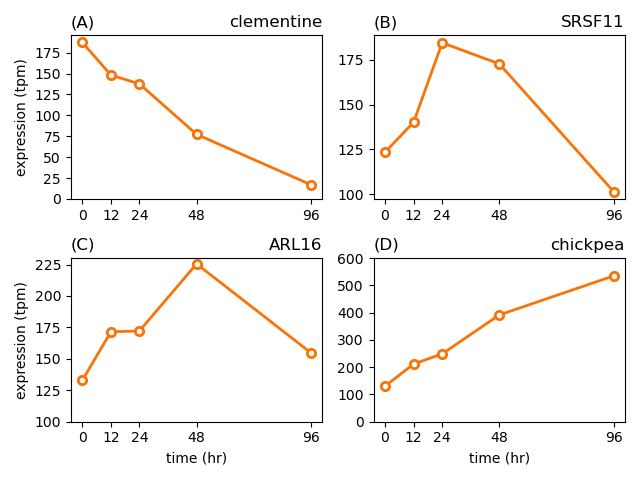

In his discussion, Moriarty says that these data provide evidence for an ancient program of cortical gene expression that causes the sand mouse's life to flash before its eyes (very slowly).

In addition, Adler et al. systematically measured mRNA synthesis rates (in mRNA/hr) and mRNA halflife (in hr), also in the prefrontal cortex, for every gene in the sand mouse.


## Check that the Gene Names Match

In [1]:
# import the gene names into python
moriarty_gene = []                               # set up an empty list
with open("Moriarty_SuppTable1", "r") as infile: # open the file for reading
    next(infile)                                 # skip the header
    for line in infile:                          # iterate through each line
        a = line.split()                         # split each line with space
        b = a[0]                                 # pick the first column (gene name)
        moriarty_gene.append(b)                  # append it to the moriarty list

        # the same for the Adler data
adler_gene = []                                  # set up an empty list
with open("Adler_SuppTable2", "r") as infile:    # open the file for reading
    next(infile)                                 # skip the header
    for line in infile:                          # iterate through each line
        a = line.split()                         # split each line with space
        b = a[0]                                 # pick the first column (gene name)
        adler_gene.append(b)                     # append it to the adler list

In [2]:
# compare the gene names for moriarty only
only_moriarty = []                      # set up an empty list
for gene in moriarty_gene:              # iterate through each gene in moriarty
    if gene not in adler_gene:          # pick those not included in adler
        only_moriarty.append(gene)      # append those to the list
print("There are %i genes that appears only in Moriarty's data, which are %s." %(len(only_moriarty), only_moriarty))

There are 28 genes that appears only in Moriarty's data, which are ['15-Sep', '2-Mar', '1-Mar', '10-Sep', '7-Mar', '4-Mar', '2-Sep', '11-Sep', '1-Mar', '6-Mar', '11-Mar', '3-Mar', '8-Sep', '7-Sep', '14-Sep', '6-Sep', '1-Dec', '8-Mar', '5-Mar', '9-Mar', '12-Sep', '1-Sep', '4-Sep', '10-Mar', '9-Sep', '2-Mar', '5-Sep', '3-Sep'].


It turns out that there are **28** genes that appears **only** in Moriarty's data, which seems to be all named after dates.  
  
This is probably because Moriarty exported his supplementary methods tables from Microsoft Excel, which is a common knowledge that it causes naming problems ([Zeeberg *et al.*, 2004](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-5-80#citeas), [Ziemann *et al.*, 2016](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-016-1044-7#citeas)). A default date conversion feature in Excel could alter gene names that it considers to look like dates. Therefore, a reasonable explanation is that names like 1-Dec is actually the tumor suppressor DEC1 [Deleted in Esophageal Cancer 1].  
  
We can check if this hypothesis is true by picking out the genes that appears only in Adler's data:

In [3]:
# compare the gene names for adler only
only_adler = []                      # set up an empty list
for gene in adler_gene:              # iterate through each gene in adler
    if gene not in moriarty_gene:    # pick those not included in moriarty
        only_adler.append(gene)      # append those to the list
print("There are %i genes that appears only in Adler's data, which are %s." %(len(only_adler), only_adler))

There are 28 genes that appears only in Adler's data, which are ['DEC1', 'SEPT3', 'MARCH1', 'MARCH9', 'SEPT2', 'SEPT7', 'MARCH10', 'SEPT10', 'MARCH6', 'SEPT14', 'MARCH11', 'MARCH2', 'MARCH8', 'SEPT11', 'MARCH7', 'MARCH5', 'SEPT5', 'SEPT1', 'MARC2', 'SEP15', 'SEPT9', 'SEPT4', 'MARCH3', 'SEPT6', 'SEPT12', 'SEPT8', 'MARCH4', 'MARC1'].


The results confirm our hypothesis that the problem occurs because of Excel's date converting error.

## Explore the Data

As for the data exploration, first we want to figure out which genes have the highest mRNA synthesis rate and which have the longest mRNA halflife.

In [4]:
# import the mRNA synthesis rate and halflife
adler = []                                       # set up an empty list for Adler data
with open("Adler_SuppTable2", "r") as infile:    # open the file for reading
    next(infile)                                 # skip the header
    for line in infile:                          # iterate through each line
        a = line.split()                         # split each line with space
        b = a[0:3]                               # get all three columns
        adler.append(b)                          # append them to the list

# output the five genes with the highest mRNA synthesis rate
def Second(elem):                            # define a function to get the second element
    return float(elem[1])                    # and convert it to a float
adler.sort(key = Second, reverse = True)     # descend by the second element of the list
gene = []; sr = []                           # create an empty list
for i in adler[0:5]:                         # iterate through top 5
    gene.append(i[0])                        # get the gene name
    sr.append(i[1])                          # get the synthesis rate
print("%s have the highest mRNA systhesis rate of %s mRNA/hr, respectively." %(gene, sr))

['ATN1', 'TIAL1', 'ZNF222', 'ANKS4B', 'XRN2'] have the highest mRNA systhesis rate of ['130.5', '118.6', '112.5', '85.6', '80.8'] mRNA/hr, respectively.


In [5]:
# output the five genes with the longest mRNA halflife
def Third(elem):                            # define a function to get the third element
    return float(elem[2])                   # and convert it to a float
adler.sort(key = Third, reverse = True)     # descend by the second element of the list
gene = []; hl = []                          # create an empty list
for i in adler[0:5]:                        # iterate through top 5
    gene.append(i[0])                       # get the gene name
    hl.append(i[2])                         # get the halflife
print("%s have the longest mRNA halflife of %s hr, respectively.." %(gene, hl))

['DHX58', 'ZNF679', 'NEBL', 'SMAD5', 'RGMA'] have the longest mRNA halflife of ['69.1', '62.8', '60.1', '58.7', '57.8'] hr, respectively..


  Next we want to calculate the ratio of expression at t=96 hours post-mortem vs. t=0 in Moriarty 's data.  

In [6]:
# import the expression data
moriarty = []                                       # set up an empty list for Moriarty data
with open("Moriarty_SuppTable1", "r") as infile:    # open the file for reading
    next(infile)                                    # skip the header
    for line in infile:                             # iterate through each line
        a = line.split()                            # split each line with space
        b = a[0:6]                                  # get all six columns
        moriarty.append(b)                          # append them to the list

# calculate the ratio of expression at t=96 vs. t=0
for gene in moriarty:                               # iterate through each gene
    ratio = round(float(gene[5])/float(gene[1]),4)  # calculate the ratio and round to 4 decimal places
    gene.append(ratio)                              # append the ratio to each gene

# output top 5
def Seventh(elem):                                  # define a function to get the seventh element
    return elem[6]
moriarty.sort(key = Seventh, reverse = True)        # descend by the seventh element (the ratio) of the list
gene = []; exp = []
for i in moriarty[0:5]:                             # iterate through top 5
    gene.append(i[0])                               # get the gene name
    exp.append(i[6])                                # get the expression
print("%s have the highest ratio of expression at t=96 hours post-mortem vs. t=0 of %s respectively." %(gene, exp))

['DHX58', 'NEBL', 'ZNF679', 'RGMA', 'ISM2'] have the highest ratio of expression at t=96 hours post-mortem vs. t=0 of [31.3398, 26.5472, 25.9841, 23.3763, 21.8042] respectively.


## Figure out What Happened

First we want to merge the files on gene names. Output one whitespace-delimited, column-justified data line consisting of 7 fields per line:  
  
- gene name
- Four expression ratios relative to t=0: i.e. tpm[12h]/tpm[0], tpm[24h]/tpm[0], tpm[48h]/tpm[0], tpm[96h]/tpm[0], by processing the TPM data in Moriarty_SuppTable1
- DNA synthesis rate (in mRNA/hr) and mRNA decay halflife (in hr) from Adler_SuppTable2 

In [7]:
# merge two files on gene names
sandmouse = []
moriarty.sort(); moriarty_gene.sort()  # sort the data for later index to match
adler.sort(); adler_gene.sort()
for gene in moriarty:                  # iterate through each line of Moriarty data
    if gene[0] in adler_gene:          # get the genes in both data
        sandmouse.append("{0:20s}".format(gene[0]))      # store the gene names
        for i in range(4):             # get the expression ratios and round to 4 decimal places
            sandmouse.append("{0:20.4f}".format((float(gene[i+2])/float(gene[1]))))
                                       # get the synthesis rate and halflife from Adler data by index
        sandmouse.append("{0:20.4f}".format(float(adler[adler_gene.index(gene[0])][1])))
        sandmouse.append("{0:20.4f}".format(float(adler[adler_gene.index(gene[0])][2])))
        sandmouse += "\n"              # add a newline character in between each gene

# output the data of 7 fields per line
with open('sandmouse.txt', 'w') as outfile:     # open a file named 'sandmouse.txt' for writing ('w')
                                                # add a header
    outfile.write("{0:20s}{1:20s}{2:20s}{3:20s}{4:20s}{5:20s}{6:20s} \n".format("gene","tpm[12h]/tpm[0]","tpm[24h]/tpm[0]","tpm[48h]/tpm[0]","tpm[96h]/tpm[0]","DNA Synthesis Rate","mRNA Decay Halflife"))
    for gene in sandmouse:                      # for each item in the list data
        outfile.write(gene)                     # write the item to the file
        
# check the file
! head sandmouse.txt

gene                tpm[12h]/tpm[0]     tpm[24h]/tpm[0]     tpm[48h]/tpm[0]     tpm[96h]/tpm[0]     DNA Synthesis Rate  mRNA Decay Halflife  
A1BG                              1.1794              1.1605              0.8618              0.4189              7.3000             16.6000
A1CF                              1.2276              1.7649              2.0634              1.6455              1.2000             22.5000
A2M                               1.4125              1.7849              2.0738              2.2199              2.3000             24.7000
A2ML1                             1.0983              1.0809              0.7283              0.3064              1.0000             16.0000
A3GALT2                           0.6865              0.5000              0.1568              0.0114              8.3000             10.3000
A4GALT                            1.1496              1.1575              1.1422              0.6556             10.5000             19.1000
A4GNT       

Then we would like to further explore what actually happens after the mouse dies.

In [8]:
# read the merged file 
sandmouse = []
with open('sandmouse.txt', 'r') as infile:      # open the file for reading ('r')
    next(infile)                                # skip the header
    for gene in infile:                         # iterate through each line in the file
        sandmouse.append(gene.split()[0:7])     # split the line and append them to a list

# get the genes with the highest expression ratio t=96/t=0
def Fifth(elem):                                # define a function to get the fifth element
    return float(elem[4])
sandmouse.sort(key = Fifth, reverse = True)     # sort the data by t=96/t=0 expresstion ratio
print("Here are top10 genes with the highest 96h/0h expression ratio:")
for gene in sandmouse[0:10]:                    
    print("%s with a 96h/0h expression ratio of %s has a %shr mRNA decay halflife." %(gene[0],gene[4],gene[6]))

Here are top10 genes with the highest 96h/0h expression ratio:
DHX58 with a 96h/0h expression ratio of 31.3398 has a 69.1000hr mRNA decay halflife.
NEBL with a 96h/0h expression ratio of 26.5472 has a 60.1000hr mRNA decay halflife.
ZNF679 with a 96h/0h expression ratio of 25.9841 has a 62.8000hr mRNA decay halflife.
RGMA with a 96h/0h expression ratio of 23.3763 has a 57.8000hr mRNA decay halflife.
ISM2 with a 96h/0h expression ratio of 21.8042 has a 55.4000hr mRNA decay halflife.
SMAD5 with a 96h/0h expression ratio of 21.4286 has a 58.7000hr mRNA decay halflife.
RNF223 with a 96h/0h expression ratio of 20.8336 has a 50.5000hr mRNA decay halflife.
TIMM50 with a 96h/0h expression ratio of 20.5155 has a 56.1000hr mRNA decay halflife.
L2HGDH with a 96h/0h expression ratio of 19.5892 has a 52.3000hr mRNA decay halflife.
SLBP with a 96h/0h expression ratio of 19.0213 has a 48.5000hr mRNA decay halflife.


It seems that genes with a higher 96h/0h expression ratio also have a longer mRNA decay halflife, but we don't know if it is a coincidence or indeed a general situation, so we would like to run more analysis on the whole dataset.

In [9]:
# divide the genes to two groups according to the 96/0 expression ratio
# since we have already sort it by the ratio, we could just use index to divide 
higher = sandmouse[0:round(len(sandmouse)/2)]
higher_hl = []
for gene in higher:
    higher_hl.append(float(gene[6])) # get the mRNA halflife for those gene

# calculate the mean of halflife for genes with higher 96/0 expression ratio
higher_hl_sum = 0
for i in higher_hl:
    higher_hl_sum += float(i)
higher_hl_mean = higher_hl_sum/len(higher_hl) 
print("For genes with a higher 96h/0h expression ratio, mean of mRNA decay halflife is {0:.3f} hrs.".format(higher_hl_mean))

# and also the lower half 
lower = sandmouse[round(len(sandmouse)/2):-1]
lower_hl = []
for gene in lower:
    lower_hl.append(float(gene[6]))
lower_hl_sum = 0
for i in lower_hl:
    lower_hl_sum += float(i)
lower_hl_mean = lower_hl_sum/len(lower_hl)
print("For genes with a lower 96h/0h expression ratio, mean of mRNA decay halflife is {0:.3f} hrs.".format(lower_hl_mean))

For genes with a higher 96h/0h expression ratio, mean of mRNA decay halflife is 17.643 hrs.
For genes with a lower 96h/0h expression ratio, mean of mRNA decay halflife is 8.562 hrs.


Is this difference statistical significant?

In [10]:
from scipy import stats
stats.ttest_ind(higher_hl, lower_hl)

Ttest_indResult(statistic=154.07989776238855, pvalue=0.0)

We run the two-sided student t test to quantify the difference between the arithmetic means of the two samples. The p-value quantifies the probability of observing as or more extreme values assuming the null hypothesis, that the samples are drawn from populations with the same population means, is true.   
  
Since we get a relatively small p-value(0.0), it indicates that our observation is not so unlikely to have occurred by chance. So we could say that **there is indeed a difference in mRNA halflife for gene groups with different 96h/0h expression ratio.**  
    
    
A possible explanation is that since those gene have a longer mRNA decay halflife, it takes more time for those mRNA to decay. But the typical mRNA synthesis rate of mammalian is 2 mRNAs/hr, which is much more higher than the typical mRNA decay halflife of 9h ([Schwanhäusser *et al.*, 2011](http://www.nature.com/nature/journal/v473/n7347/full/nature10098.html)), therefore, after the sandmouse deads, a significant amount of those mRNA is still in a steady state or being synthesized, causing the total amount of mRNA within the cell continues to rise.  
  
It is not until most of the mRNAs end their homeostasis and more and more of them are degraded that the total number of mRNAs begin to decline after reaching the maximum value. Because of the lag in total numbers, the gene seemed to be upregulated after death. Although there are studies actually find out that there is some level of active post-mortem mRNA transcription ([Pozhitkov & Noble, 2017](https://onlinelibrary.wiley.com/doi/abs/10.1002/bies.201700066)), this seems not the case for Moriarty's study.  
  